In [128]:
from suaBibSignal import *
import peakutils    #alternativas  #from detect_peaks import *   #import pickle
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import time

In [129]:
print("Inicializando o decoder...")
fs = 44100
sd.default.samplerate = fs
sd.default.channels = 1
duration = 5
samples = duration * fs

dtmf_frequencies = {
        '1': (697, 1209),
        '2': (697, 1336),
        '3': (697, 1477),
        '4': (770, 1209),
        '5': (770, 1336),
        '6': (770, 1477),
        '7': (852, 1209),
        '8': (852, 1336),
        '9': (852, 1477),
        '*': (941, 1209),
        '0': (941, 1336),
        '#': (941, 1477),
        'A': (697, 1633),
        'B': (770, 1633),
        'C': (852, 1633),
        'D': (941, 1633)
}

Inicializando o decoder...


In [130]:
t = 2
print(f"Começando a gravar em {t} segundos...")
time.sleep(t)
print("Gravando...")
myrecording = sd.rec(int(samples), samplerate=fs, channels=1)
sd.wait()
print("Gravação finalizada!")

Começando a gravar em 2 segundos...
Gravando...
Gravação finalizada!


Índices de picos: [  600  4260  7385  7546  7798  8964 10510]
Frequências dos picos: [ 120.00108845  852.00772796 1477.01339695 1509.21368901 1559.61414616
 1792.81626137 2102.01906593]


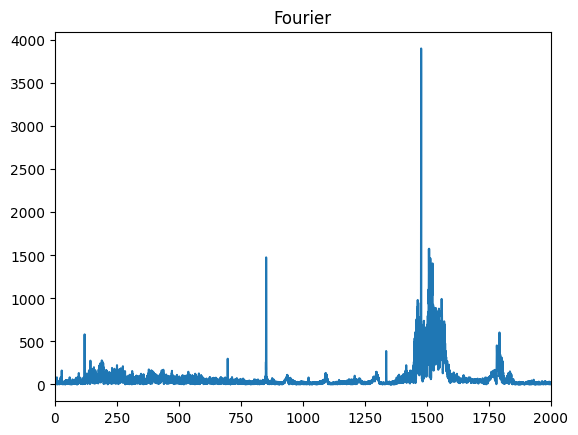

In [131]:
y = myrecording[:,0]
signal = signalMeu()

# Encontre os indices dos picos
xf, yf = signal.calcFFT(y, fs)

# Encontre os indices dos picos
indexes = peakutils.indexes(yf, thres=0.14, min_dist=150)
peak_freqs = xf[indexes]
print(f"Índices de picos: {indexes}")
print(f"Frequências dos picos: {peak_freqs}")

# Calcule e plote o Fourier do sinal audio. como saida tem-se a amplitude e as frequencias
signal.plotFFT(y, fs)
plt.xlim(0, 2000)
plt.show()

In [132]:
# Função para encontrar a tecla DTMF
def find_dtmf_key(frequencies, dtmf_dict, tolerance=0.5):
    for key, value in dtmf_dict.items():
        freq1, freq2 = value
        for freq_pick in frequencies:
            if np.isclose(freq1, freq_pick, atol=tolerance):
                for freq_pick2 in frequencies:
                    if np.isclose(freq2, freq_pick2, atol=tolerance):
                        return key
    return None

if len(peak_freqs) > 1:
    key = find_dtmf_key(peak_freqs, dtmf_frequencies)
    if key:
        print(f"Tecla DTMF identificada: {key}")
    else:
        print("Nenhuma tecla DTMF correspondente encontrada.")
else:
    print("Nenhuma frequencia correspondente encontrada.")

Tecla DTMF identificada: 9
